In [1]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
from sklearn import preprocessing



# Climate Data

In [2]:
climate = pd.read_csv("Data/2023_scm_climate.csv")
climate = clean_columns(climate)
climate["date"] = pd.to_datetime(climate["date"], format="%m/%d/%y")
climate["week"] = climate["date"].dt.strftime("%U").astype(int)
# climate


# Weekly Climate Data

In [3]:
one_week_climate = pd.read_csv("Data/adults_one_week_climate.csv")
two_week_climate = pd.read_csv("Data/adults_two_week_climate.csv")


# Management Data

In [25]:
management = pd.read_csv("Data/2023_management.csv")
management = clean_columns(management)
# management


# Landscape Data

## 500m Radius

In [5]:
cdl_500 = pd.read_csv("Data/Landscape/cdl_500_history.csv")
cdl_500 = cdl_500.drop("Unnamed: 0", axis=1)


## 1000m Radius

In [6]:
cdl_1000 = pd.read_csv("Data/Landscape/cdl_1000_history.csv")
cdl_1000 = cdl_1000.drop("Unnamed: 0", axis=1)


## 2000m Radius

In [7]:
cdl_2000 = pd.read_csv("Data/Landscape/cdl_2000_history.csv")
cdl_2000 = cdl_2000.drop("Unnamed: 0", axis=1)


## 3000m Radius

In [8]:
cdl_3000 = pd.read_csv("Data/Landscape/cdl_3000_history.csv")
cdl_3000 = cdl_3000.drop("Unnamed: 0", axis=1)


# Sticky Card Data

In [9]:
adults = pd.read_csv('Data/2023_scm_counts.csv')
adults = clean_columns(adults)
#adults["collection_date"] = pd.to_datetime(adults["collection_date"], format="%m/%d/%y")
#adults["week"] = adults["date"].dt.strftime("%U").astype(int)
adults = adults.drop(['initials'], axis=1)
adults = adults.dropna()
adults = adults.rename({'site':'record_id'}, axis=1)
adults['total_f_scm'] = adults['n_scm_i_f'] + adults['n_scm_o_f']
adults['total_m_scm'] = adults['n_scm_i_m'] + adults['n_scm_o_m']
adults['total_scm'] = adults['total_m_scm'] + adults['total_f_scm']
adults

card_id data_collector     record_id collection_date  n_scm_i_m  \
20       2246   Janice Degni  DEG_DIE_HILL         4/21/23       16.0   
22       2266   Janice Degni  DEG_DIE_HILL         4/27/23       43.0   
24       2374   Janice Degni  DEG_DIE_HILL          5/4/23       40.0   
26       2560   Janice Degni  DEG_DIE_HILL         5/11/23       80.0   
28       2558   Janice Degni  DEG_DIE_HILL         5/18/23       21.0   
...       ...            ...           ...             ...        ...   
2237     2270  Marion Zuefle       ZUE_REE         4/19/23        1.0   
2239     2272  Marion Zuefle       ZUE_REE         4/26/23       44.0   
2241     2384  Marion Zuefle       ZUE_REE          5/2/23       45.0   
2245     2552  Marion Zuefle       ZUE_REE         5/17/23       38.0   
2246     2636  Marion Zuefle       ZUE_REE         5/23/23       86.0   

      n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  \
20         10.0        7.0        5.0              0.0              0.0   
22          9.0       51.0       12.0              0.0              0.0   
24         20.0      136.0      128.0              9.0             44.0   
26         18.0       36.0       15.0              3.0              0.0   
28          0.0        4.0        3.0              0.0              0.0   
...         ...        ...        ...              ...              ...   
2237        2.0        4.0        1.0              0.0              0.0   
2239       34.0       21.0       34.0              0.0              0.0   
2241       47.0       27.0       46.0              3.0              4.0   
2245       21.0        5.0        3.0              4.0              2.0   
2246       68.0       16.0       10.0              0.0              0.0   

      total_f_scm  total_m_scm  total_scm  
20           15.0         23.0       38.0  
22           21.0         94.0      115.0  
24          148.0        176.0      324.0  
26           33.0        116.0      149.0  
28            3.0         25.0       28.0  
...           ...          ...        ...  
2237          3.0          5.0        8.0  
2239         68.0         65.0      133.0  
2241         93.0         72.0      165.0  
2245         24.0         43.0       67.0  
2246         78.0        102.0      180.0  

[605 rows x 13 columns]

# Create Table - All Features

In [10]:
adult_features = adults.merge(one_week_climate, on=["record_id", "collection_date"])
adult_features = adult_features.merge(two_week_climate, on=["record_id", "collection_date"])
adult_features = adult_features.merge(management, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_500, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_1000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_2000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)
adult_features = adult_features.merge(cdl_3000, left_on='record_id', right_on='field_id').drop('field_id', axis=1)

adult_features.to_csv('Data/2023_adult_features.csv')

# Correlations

## Climate and Wire Mesh Data

In [11]:
adult_climate = adults.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
adult_climate = adult_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_climate


card_id data_collector     record_id collection_date  n_scm_i_m  \
0       2246   Janice Degni  DEG_DIE_HILL         4/21/23       16.0   
1       2266   Janice Degni  DEG_DIE_HILL         4/27/23       43.0   
2       2374   Janice Degni  DEG_DIE_HILL          5/4/23       40.0   
3       2560   Janice Degni  DEG_DIE_HILL         5/11/23       80.0   
4       2558   Janice Degni  DEG_DIE_HILL         5/18/23       21.0   
..       ...            ...           ...             ...        ...   
429     2270  Marion Zuefle       ZUE_REE         4/19/23        1.0   
430     2272  Marion Zuefle       ZUE_REE         4/26/23       44.0   
431     2384  Marion Zuefle       ZUE_REE          5/2/23       45.0   
432     2552  Marion Zuefle       ZUE_REE         5/17/23       38.0   
433     2636  Marion Zuefle       ZUE_REE         5/23/23       86.0   

     n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0         10.0        7.0        5.0              0.0              0.0  ...   
1          9.0       51.0       12.0              0.0              0.0  ...   
2         20.0      136.0      128.0              9.0             44.0  ...   
3         18.0       36.0       15.0              3.0              0.0  ...   
4          0.0        4.0        3.0              0.0              0.0  ...   
..         ...        ...        ...              ...              ...  ...   
429        2.0        4.0        1.0              0.0              0.0  ...   
430       34.0       21.0       34.0              0.0              0.0  ...   
431       47.0       27.0       46.0              3.0              4.0  ...   
432       21.0        5.0        3.0              4.0              2.0  ...   
433       68.0       16.0       10.0              0.0              0.0  ...   

     total_m_scm  total_scm  min_temp_f_1_week  ave_temp_f_1_week  \
0           23.0       38.0            40.4875            52.5750   
1           94.0      115.0            35.9625            46.4125   
2          176.0      324.0            37.4125            44.4375   
3          116.0      149.0            36.0625            47.6000   
4           25.0       28.0            36.8750            51.4625   
..           ...        ...                ...                ...   
429          5.0        8.0            47.8125            59.8875   
430         65.0      133.0            38.5750            47.5625   
431         72.0      165.0            38.3750            45.9500   
432         43.0       67.0            45.5250            57.7375   
433        102.0      180.0            44.3000            55.4750   

     max_temp_f_1_week  rain_inches_1_week  min_temp_f_2_week  \
0              64.6875                0.63          36.000000   
1              56.8625                0.69          39.193333   
2              51.4875                3.11          36.940000   
3              59.1000                0.36          36.766667   
4              66.0375                0.00          36.460000   
..                 ...                 ...                ...   
429            72.0125                0.39          41.406667   
430            56.5125                1.15          43.733333   
431            53.4750                1.94          38.926667   
432            69.9750                0.00          43.120000   
433            66.6500                0.73          44.966667   

     ave_temp_f_2_week  max_temp_f_2_week  rain_inches_2_week  
0            48.546667          61.106667                0.63  
1            50.920000          62.660000                1.32  
2            45.713333          54.500000                3.69  
3            46.380000          55.993333                3.33  
4            49.460000          62.426667                0.36  
..                 ...                ...                 ...  
429          52.953333          64.533333                1.56  
430          54.706667          65.686667                1.54  
431  

In [12]:
adult_climate_subset = adult_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
    ]
]

adult_climate_subset["collection_date"] = pd.to_datetime(
    adult_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2999537200.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_climate_subset["collection_date"] = pd.to_datetime(


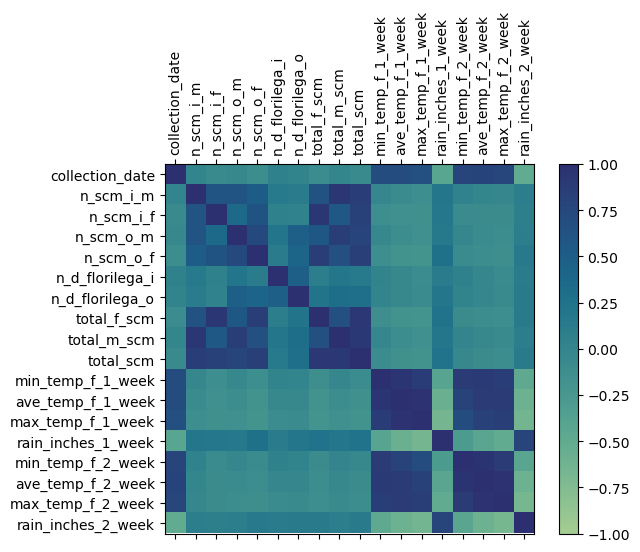

In [13]:
corr = adult_climate_subset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap="crest", vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(adult_climate_subset.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(adult_climate_subset.columns)
ax.set_yticklabels(adult_climate_subset.columns)
plt.show()


In [14]:
corr.style.background_gradient(cmap="crest").format(precision=2)

## Landscape and Sticky Card Data

### 500m

In [23]:
adults_500 = adults.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_500 = adults_500.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_500["collection_date"] = pd.to_datetime(
    adults_500["collection_date"], format="%m/%d/%y"
)

In [24]:
corr = adults_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 1000m

In [17]:
adults_1000 = adults.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_1000 = adults_1000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_1000["collection_date"] = pd.to_datetime(
    adults_1000["collection_date"], format="%m/%d/%y"
)

In [18]:
corr = adults_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 2000m

In [19]:
adults_2000 = adults.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_2000 = adults_2000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_2000["collection_date"] = pd.to_datetime(
    adults_2000["collection_date"], format="%m/%d/%y"
)

In [20]:
corr = adults_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 3000m

In [21]:
adults_3000 = adults.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_3000 = adults_3000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_3000["collection_date"] = pd.to_datetime(
    adults_3000["collection_date"], format="%m/%d/%y"
)

In [22]:
corr = adults_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# Management and Wire Mesh Data

In [135]:
adults_management = adults.merge(management, left_on='record_id', right_on='field_id')

In [136]:
le = preprocessing.LabelEncoder()
adults_management['cover_crop'] = le.fit_transform(adults_management['cover_crop'])
adults_management['manure']= le.fit_transform(adults_management['manure'])
adults_management['tillage'] = le.fit_transform(adults_management['tillage'])

In [137]:
stats.pointbiserialr(adults_management['total_scm'], adults_management['cover_crop'])

SignificanceResult(statistic=0.12762815487397275, pvalue=0.007695532362511533)

In [145]:
cover_crop = adults_management[['record_id', 'total_f_scm', 'total_m_scm', 'total_scm', 'cover_crop']]
cover_crop['cover_crop'].replace(0, 'No', inplace=True)
cover_crop['cover_crop'].replace(1, 'Partial', inplace=True)
cover_crop['cover_crop'].replace(2, 'Yes', inplace=True)
cover_crop

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2716024467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop['cover_crop'].replace(0, 'No', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2716024467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop['cover_crop'].replace(1, 'Partial', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2716024467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

record_id  total_f_scm  total_m_scm  total_scm cover_crop
0    DEG_DIE_HILL         15.0         23.0       38.0         No
1    DEG_DIE_HILL         21.0         94.0      115.0         No
2    DEG_DIE_HILL        148.0        176.0      324.0         No
3    DEG_DIE_HILL         33.0        116.0      149.0         No
4    DEG_DIE_HILL          3.0         25.0       28.0         No
..            ...          ...          ...        ...        ...
430       ZUE_REE          3.0          5.0        8.0         No
431       ZUE_REE         68.0         65.0      133.0         No
432       ZUE_REE         93.0         72.0      165.0         No
433       ZUE_REE         24.0         43.0       67.0         No
434       ZUE_REE         78.0        102.0      180.0         No

[435 rows x 5 columns]

<Axes: title={'center': 'total_scm'}, xlabel='[cover_crop]'>

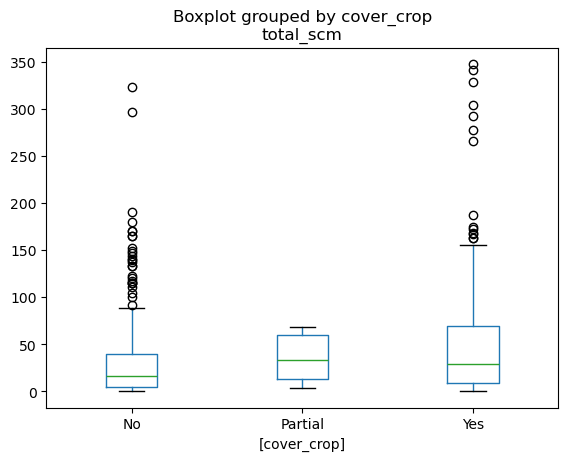

In [146]:
cover_crop[['total_scm', 'cover_crop']].boxplot(by='cover_crop', grid=False)

In [147]:
yes_cc = cover_crop.loc[cover_crop['cover_crop'] == "Yes"]['total_scm']
no_cc = cover_crop.loc[cover_crop['cover_crop'] == "No"]['total_scm']
stats.ttest_ind(a=yes_cc, b=no_cc)

TtestResult(statistic=2.648612776047801, pvalue=0.008386153561087873, df=421.0)

In [148]:
manure = adults_management[['record_id', 'total_f_scm', 'total_m_scm', 'total_scm', 'manure']]
manure['manure'].replace(0, 'No', inplace=True)
manure['manure'].replace(1, 'Yes', inplace=True)
manure['manure'].replace(2, 'NA', inplace=True)
manure

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/4017654348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure['manure'].replace(0, 'No', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/4017654348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manure['manure'].replace(1, 'Yes', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/4017654348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

record_id  total_f_scm  total_m_scm  total_scm manure
0    DEG_DIE_HILL         15.0         23.0       38.0     No
1    DEG_DIE_HILL         21.0         94.0      115.0     No
2    DEG_DIE_HILL        148.0        176.0      324.0     No
3    DEG_DIE_HILL         33.0        116.0      149.0     No
4    DEG_DIE_HILL          3.0         25.0       28.0     No
..            ...          ...          ...        ...    ...
430       ZUE_REE          3.0          5.0        8.0     No
431       ZUE_REE         68.0         65.0      133.0     No
432       ZUE_REE         93.0         72.0      165.0     No
433       ZUE_REE         24.0         43.0       67.0     No
434       ZUE_REE         78.0        102.0      180.0     No

[435 rows x 5 columns]

In [150]:
yes_manure = manure.loc[manure['manure'] == "Yes"]['total_scm']
no_manure = manure.loc[manure['manure'] == "No"]['total_scm']
stats.ttest_ind(a=yes_manure, b=no_manure)

TtestResult(statistic=1.524437699944876, pvalue=0.1281538087726191, df=419.0)

In [35]:
stats.pointbiserialr(adults_management['total_scm'], adults_management['tillage'])

SignificanceResult(statistic=0.00489989170713241, pvalue=0.918834540275569)

# Peak Adult Abundance as Response

In [161]:
adult_peak = adults.loc[adults.groupby('record_id')['total_scm'].idxmax()]

In [162]:
adult_peak_climate = adult_peak.merge(
    one_week_climate, on=["record_id", "collection_date"]
)
adult_peak_climate = adult_peak_climate.merge(
    two_week_climate, on=["record_id", "collection_date"]
)
adult_peak_climate


card_id   data_collector      record_id collection_date  n_scm_i_m  \
0      2374     Janice Degni   DEG_DIE_HILL          5/4/23       40.0   
1      2244     Janice Degni    DEG_DIE_SWC         4/21/23        9.0   
2      2582     Janice Degni   DEG_FOU_WOOD         5/18/23       17.0   
3      2254     Janice Degni  DEG_PER_STRIP         4/27/23       26.0   
4      2368     Janice Degni        DEG_VIL          5/4/23       91.0   
5      2586     Janice Degni  DEG_YOU_BOCES         5/25/23       77.0   
6      2574     Janice Degni  DEG_YOU_JONES         5/25/23       81.0   
7      2594     Janice Degni  DEG_YOU_OSHEA         5/18/23       25.0   
8      2318    Shea Crowther        DIP_CUR          5/2/23       45.0   
9      2034    Shea Crowther        DIP_FLE         4/11/23       71.0   
10     2030    Shea Crowther        DIP_PAT         4/11/23       23.0   
11     2298    Aaron Gabriel        GAB_ALL          5/1/23      112.0   
12     2304    Aaron Gabriel        GAB_STE          5/1/23       11.0   
13     2342   Katelyn Miller        KAT_BAR         4/30/23       46.0   
14     2354   Katelyn Miller        KAT_HAB         4/30/23       18.0   
15     2162   Katelyn Miller      KAT_HAB_2         4/25/23       36.0   
16     2352   Katelyn Miller        KAT_JEF         4/30/23       13.0   
17     2666   Katelyn Miller      KAT_JEF_2         5/22/23        5.0   
18     2046   Katelyn Miller        KAT_SAU         4/10/23       33.0   
19     2406   Katelyn Miller      KAT_SAU_2          5/8/23       21.0   
20     2174   Katelyn Miller        KAT_TEE         4/24/23        4.0   
21     2348   Katelyn Miller      KAT_TEE_2         4/30/23       38.0   
22     2776    Mike Stanyard        LET_NOB          6/1/23       53.0   
23     2290      Jodi Letham        LET_TAB          5/1/23       27.0   
24     2222      Jeff Miller        MIL_CHA         4/10/23       35.0   
25     2236      Jeff Miller        MIL_MCC         4/27/23       37.0   
26     2220      Jeff Miller        MIL_YOD         4/10/23       70.0   
27     2024     Anna DiPaola        POV_DUN          4/4/23       26.0   
28     2554      Abby Seaman        SEA_HOO          5/5/23        8.0   
29     2284       Erik Smith        SMI_CAN          5/1/23       17.0   
30     2106       Erik Smith        SMI_COB         4/12/23       20.0   
31     2100       Erik Smith        SMI_CRO         4/12/23       45.0   
32     2108       Erik Smith        SMI_DOU         4/12/23        6.0   
33     2654       Erik Smith        SMI_DUR         5/22/23      123.0   
34     2117       Erik Smith        SMI_HOF         4/13/23       49.0   
35     2116       Erik Smith        SMI_HOL         4/12/23       31.0   
36     2118       Erik Smith        SMI_JOH         4/12/23       35.0   
37     2142       Erik Smith      SMI_JOH_2         4/18/23       38.0   
38     2104       Erik Smith        SMI_KEL         4/12/23       15.0   
39     2530       Erik Smith        SMI_LAT          5/8/23       20.0   
40     2288       Erik Smith        SMI_MCC          5/1/23       16.0   
41     2632    Mike Stanyard        STA_COL         5/23/23      105.0   
42     2806    Mike Stanyard        STA_HEM          6/6/23        3.0   
43     2218    Mike Stanyard      STA_HEM_2         4/26/23       17.0   
44     2414    Mike Stanyard        STA_SWE          5/8/23       90.0   
45     2340    Mike Stanyard        STA_WIL          5/3/23       30.0   
46     2606      Hannah Tolz        WIS_COO         5/17/23       14.0   
47     2426         Ken Wise      WIS_COO_2          5/3/23       13.0   
48     2812         Ken Wise        WIS_HIG          6/5/23       37.0   
49     2310  Roberto Regaldo        WIS_KEN         4/28/23       53.0   
50     2308  Roberto Regaldo        WIS_MEG         4/28/23       33.0   
51     2636    Marion Zuefle        ZUE_REE         5/23/23       86.0   

    n_scm_i_f  n_scm_o_m  n_scm_o_f  n_d_florilega_i  n_d_florilega_o  ...  \
0  

In [163]:
adult_peak_climate_subset = adult_peak_climate[
    [
        "collection_date",
        "n_scm_i_m",
        "n_scm_i_f",
        "n_scm_o_m",
        "n_scm_o_f",
        "n_d_florilega_i",
        "n_d_florilega_o",
        "total_f_scm",
        "total_m_scm",
        "total_scm",
        "min_temp_f_1_week",
        "ave_temp_f_1_week",
        "max_temp_f_1_week",
        "rain_inches_1_week",
        "min_temp_f_2_week",
        "ave_temp_f_2_week",
        "max_temp_f_2_week",
        "rain_inches_2_week",
    ]
]

adult_peak_climate_subset["collection_date"] = pd.to_datetime(
    adult_peak_climate_subset["collection_date"], format="%m/%d/%y"
)


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/3616768374.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_peak_climate_subset["collection_date"] = pd.to_datetime(


In [164]:
corr = adult_peak_climate_subset.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

## Landscape and Sticky Card Data

### 500m

In [165]:
adults_peak_500 = adult_peak.merge(
    cdl_500, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_peak_500 = adults_peak_500.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_peak_500["collection_date"] = pd.to_datetime(
    adults_peak_500["collection_date"], format="%m/%d/%y"
)

In [166]:
corr = adults_peak_500.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 1000m

In [ ]:
adults_1000 = adults.merge(
    cdl_1000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_1000 = adults_1000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_1000["collection_date"] = pd.to_datetime(
    adults_1000["collection_date"], format="%m/%d/%y"
)

In [ ]:
corr = adults_1000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 2000m

In [ ]:
adults_2000 = adults.merge(
    cdl_2000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_2000 = adults_2000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_2000["collection_date"] = pd.to_datetime(
    adults_2000["collection_date"], format="%m/%d/%y"
)

In [ ]:
corr = adults_2000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

### 3000m

In [ ]:
adults_3000 = adults.merge(
    cdl_3000, left_on="record_id", right_on="field_id"
).drop('field_id', axis=1)

adults_3000 = adults_3000.drop(
    [
        "card_id",
        "data_collector",
        "record_id"
    ],
    axis=1,
)

adults_3000["collection_date"] = pd.to_datetime(
    adults_3000["collection_date"], format="%m/%d/%y"
)

In [ ]:
corr = adults_3000.corr()
corr.style.background_gradient(cmap="crest").format(precision=2)

# Management and Wire Mesh Data

In [ ]:
adults_management = adults.merge(management, left_on='record_id', right_on='field_id')

In [ ]:
le = preprocessing.LabelEncoder()
adults_management['cover_crop'] = le.fit_transform(adults_management['cover_crop'])
adults_management['manure']= le.fit_transform(adults_management['manure'])
adults_management['tillage'] = le.fit_transform(adults_management['tillage'])

In [ ]:
stats.pointbiserialr(adults_management['total_scm'], adults_management['cover_crop'])

SignificanceResult(statistic=0.12762815487397275, pvalue=0.007695532362511533)

In [ ]:
cover_crop = adults_management[['record_id', 'total_f_scm', 'total_m_scm', 'total_scm', 'cover_crop']]
cover_crop['cover_crop'].replace(0, 'No', inplace=True)
cover_crop['cover_crop'].replace(1, 'Partial', inplace=True)
cover_crop['cover_crop'].replace(2, 'Yes', inplace=True)
cover_crop

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2716024467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop['cover_crop'].replace(0, 'No', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2716024467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover_crop['cover_crop'].replace(1, 'Partial', inplace=True)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_98468/2716024467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

record_id  total_f_scm  total_m_scm  total_scm cover_crop
0    DEG_DIE_HILL         15.0         23.0       38.0         No
1    DEG_DIE_HILL         21.0         94.0      115.0         No
2    DEG_DIE_HILL        148.0        176.0      324.0         No
3    DEG_DIE_HILL         33.0        116.0      149.0         No
4    DEG_DIE_HILL          3.0         25.0       28.0         No
..            ...          ...          ...        ...        ...
430       ZUE_REE          3.0          5.0        8.0         No
431       ZUE_REE         68.0         65.0      133.0         No
432       ZUE_REE         93.0         72.0      165.0         No
433       ZUE_REE         24.0         43.0       67.0         No
434       ZUE_REE         78.0        102.0      180.0         No

[435 rows x 5 columns]

<Axes: title={'center': 'total_scm'}, xlabel='[cover_crop]'>

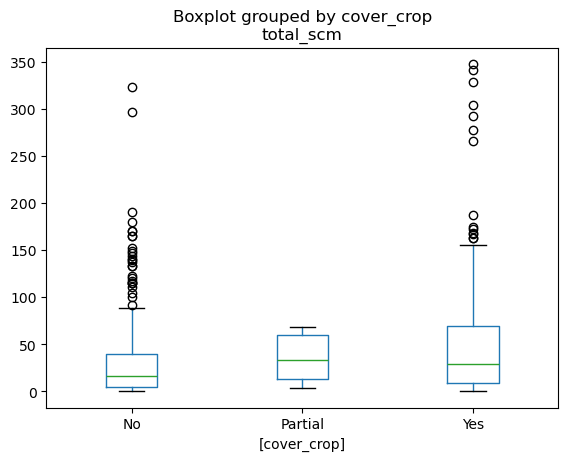

In [ ]:
cover_crop[['total_scm', 'cover_crop']].boxplot(by='cover_crop', grid=False)

In [ ]:
yes_cc = cover_crop.loc[cover_crop['cover_crop'] == "Yes"]['total_scm']
no_cc = cover_crop.loc[cover_crop['cover_crop'] == "No"]['total_scm']
stats.ttest_ind(a=yes_cc, b=no_cc)

TtestResult(statistic=2.648612776047801, pvalue=0.008386153561087873, df=421.0)